# Basic ARIMA model for NIFTY50 

In [1]:
####importing pacakages and dataset

import pandas as pd

nf= pd.read_csv('NIFTY 50_Data.csv', usecols=['Date', 'Close'], parse_dates=True, index_col=0)
dt = pd.date_range(start='2017-01-02', end='2018-12-31',freq='D')
nd = pd.DataFrame(data=nf, index=dt)
nd.index.names=['Date']
nf = nd.fillna(method='ffill')
nf.head()

##Identifying the size of the Series
nf.size

729

In [2]:
###Plotting the Series

import matplotlib.pyplot as plt

nf.Close.plot();

# Determining the Stationary of the Series by adfuller function

In [3]:
# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller

# Compute and print ADF p-value
result = adfuller(nf['Close'])
print("The p-value for the ADF test is ", result[1])

('The p-value for the ADF test is ', 0.1245212227192411)


In [4]:
##Since the p-value is greater then Critical value the series is not Satationary and hence we need to stationarize the series

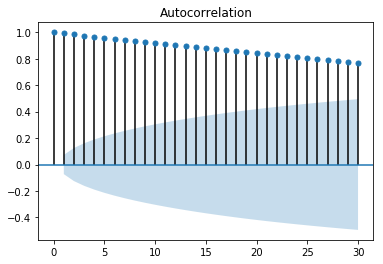

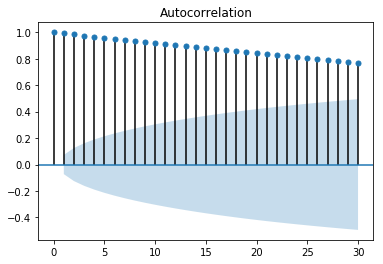

In [5]:
#Plotting ACF graphs

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(nf, lags = 30)

# Converting series to stationary

In [6]:
# Converting series to stationary by first order

nf_diff = nf.diff(periods=1, axis=0)
nf_diff= nf_diff.dropna()


# Compute and print ADF p-value
result = adfuller(nf_diff['Close'])
print("The p-value for the ADF test is ", result[1])

('The p-value for the ADF test is ', 0.0)


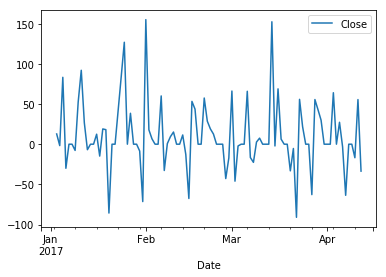

In [7]:
nf_diff[:100].plot();

In [8]:
##Splitting the Train and Test Dataset 

X = nf_diff.values
train = X[0:580] 
test = X[576:]  
predictions = []

In [9]:
### Running a simple AR model first

from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()
predictions = model_ar_fit.predict(start=578,end=729)


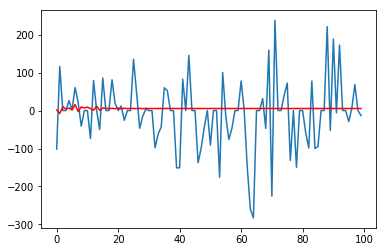

In [10]:
plt.plot(test[:100])
plt.plot(predictions[:100],color='red')

# Running ARIMA models with (p,d, q) parameters 

In [11]:
from statsmodels.tsa.arima_model import ARIMA

#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(1, 1, 1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

6212.87878535


In [12]:
###Iterating over a range of 10 values for pdq to find the combination that yeild the lowest aic

import itertools
p=d=q=range(0,10)
pdq = list(itertools.product(p,d,q))

import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

((0, 0, 0), 6213.213489789799)
((0, 0, 1), 6214.6079737323325)
((0, 0, 2), 6216.316599335209)
((0, 0, 3), 6215.569717098931)
((0, 0, 4), 6217.459886653564)
((0, 0, 5), 6219.254537906629)
((0, 0, 6), 6220.283620380335)
((0, 0, 7), 6222.216754094315)
((0, 0, 8), 6222.549625238921)
((0, 0, 9), 6224.544183607432)
((0, 1, 0), 6586.204888443279)
((0, 1, 1), 6211.500620462842)
((0, 2, 0), 7200.780547467993)
((0, 2, 1), 6584.1972641150915)
((1, 0, 0), 6214.633389976824)
((1, 0, 1), 6214.231204567956)
((1, 1, 0), 6440.9847720017415)
((1, 1, 1), 6212.8787853453805)
((1, 1, 2), 6212.4914878459795)
((1, 1, 3), 6214.438974909662)
((1, 1, 4), 6216.007393042415)
((1, 1, 5), 6217.739409010856)
((1, 1, 6), 6219.624603435275)
((1, 1, 7), 6221.352603859091)
((1, 2, 0), 6901.161440718176)
((1, 2, 3), 6222.147321014787)
((2, 0, 0), 6216.416786538764)
((2, 0, 1), 6216.1610635041025)
((2, 1, 0), 6352.571619321079)
((2, 1, 1), 6214.6866038733)
((2, 1, 2), 6214.43519021231)
((2, 1, 3), 6215.794768660667)
((2, 

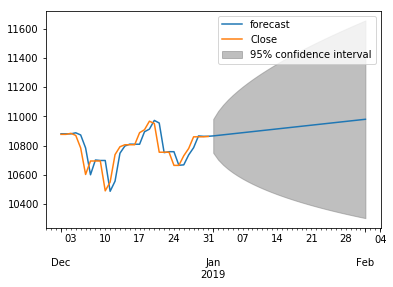

<Figure size 1080x720 with 0 Axes>

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  728
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -4006.680
Method:                       css-mle   S.D. of innovations             59.427
Date:                Mon, 04 Feb 2019   AIC                           8019.361
Time:                        13:51:40   BIC                           8033.132
Sample:                    01-03-2017   HQIC                          8024.674
                         - 12-31-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.6858      2.273      1.621      0.105      -0.770       8.141
ma.L1.D.Close     0.0322      0.036      0.906      0.365      -0.037       0.102
                                    Root

In [13]:
### AIC of 6211 is seen with parameters of (0,1,1)
# Forecast interest rates using an AR(1) model
mod = ARIMA(nf, order=(0,1,1))
res = mod.fit()
res.plot_predict('2018-12-01', '2019-02-01')
plt.figure(figsize=(15,10))
plt.show()
print(res.summary())